# Drug Classifiasion

# 1.Preprocessing data - Nguyễn Duy Phúc ITDSIU21030


In [76]:
#input library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [77]:
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


We will have 5 colums:
Age, Sex, BP (Blood Presure), Cholesterol(H/N), Na_to_K , and kind of Drug

In [78]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [79]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Data set have:
* No missing value
* 6 columns
* 200 rows

Let check info of data

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Data type are
* float64(1): Na_to_K
* int64(1): Age
* object(4): Sex, BP, Cholesterol, Drug

# Basic Data Analysis: Key variable is Drug
* Let's find:
 * Age -- Drug
 * Sex -- Drug
 * BP -- Drug
 * Cholesterol -- Drug


Drug Variable

In [81]:
df.Drug.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

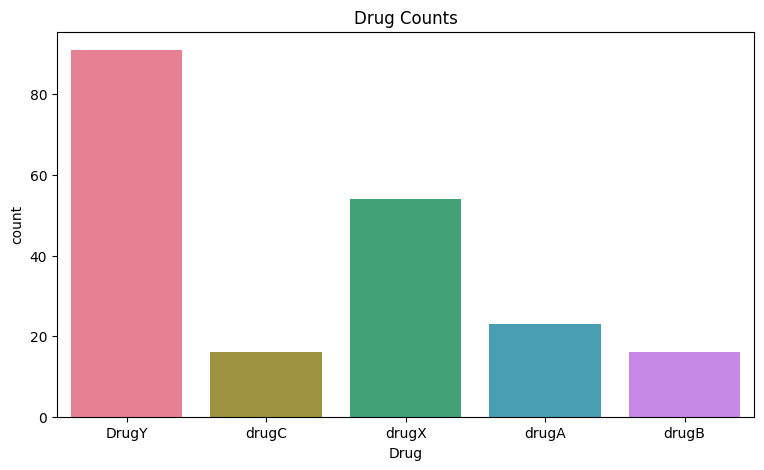

In [82]:
palette = sns.color_palette("husl", len(df.Drug.unique()))

plt.figure(figsize=(9, 5))
sns.countplot(x="Drug", data=df, palette=palette)
plt.title("Drug Counts")
plt.show()

# Age -- Drug

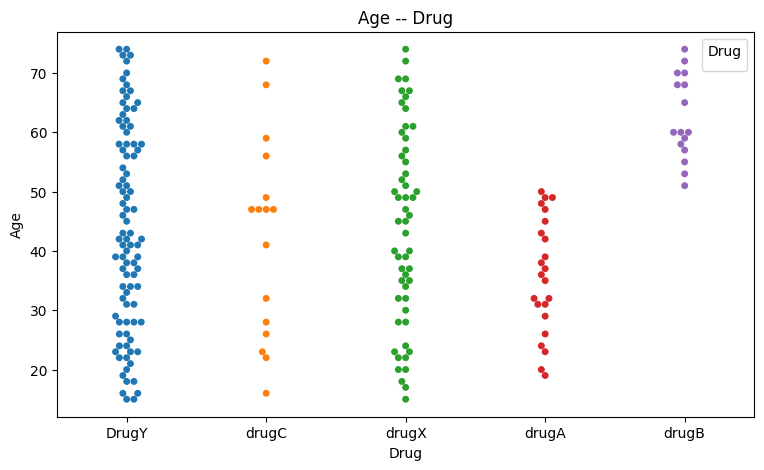

In [83]:


plt.figure(figsize=(9, 5))
sns.swarmplot(x="Drug", y="Age", data=df, hue="Drug")
plt.legend(title='Drug')
plt.title("Age -- Drug")
plt.show()


In [84]:
print("Minimum Age of DrugB",df.Age[df.Drug == "drugB"].min())
print("Maximum Age of DrugA",df.Age[df.Drug == "drugA"].max())

Minimum Age of DrugB 51
Maximum Age of DrugA 50


* DrugB is taken only by older than 51 years old.
* DrugA is taken only by younger than 50 years old.

# Sex -- Drug

In [85]:
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


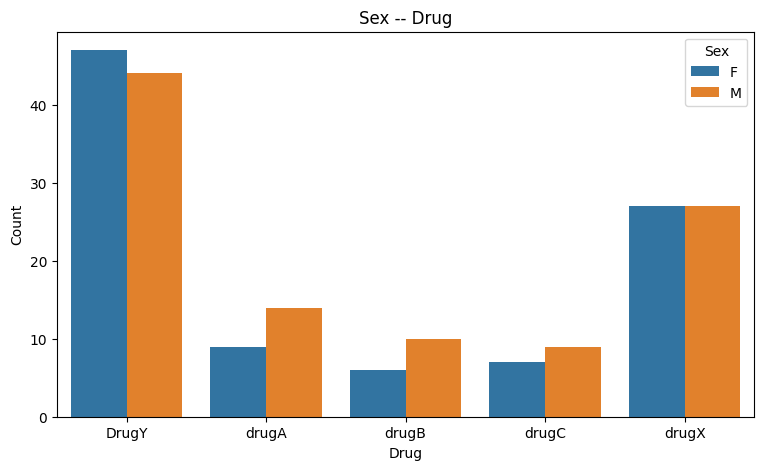

In [86]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Sex -- Drug")
plt.show()

* Male people get drugA, drugB and drugC more than male people.
* Female people get DrugY more than female people.
* drugX seems equal for male and female people.
* According to this graph, Sex feature is not an important feature for classification.



# BP -- Drug

In [87]:
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BP_Drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


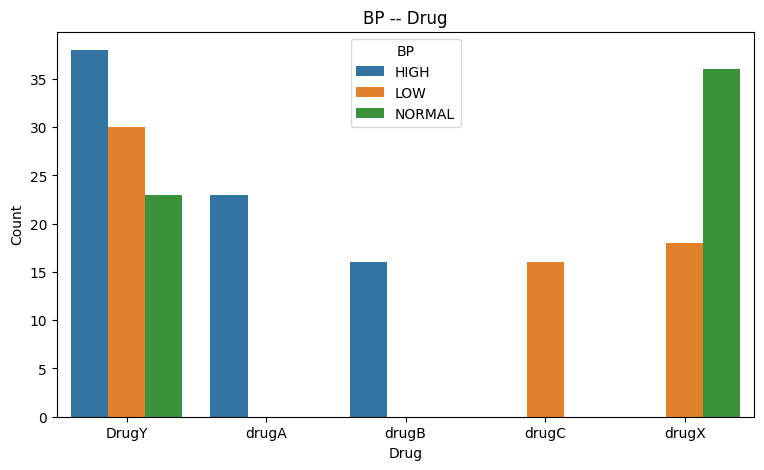

In [88]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("BP -- Drug")
plt.show()

* drugA and drugB are got only by people who have HIGH blood pressure.
* drugC is got by people who have LOW blood pressure.
* drugX is got by people who have HIGH blood pressure.
* BP is an important feature for classification.

# Na_to_K -- Drug

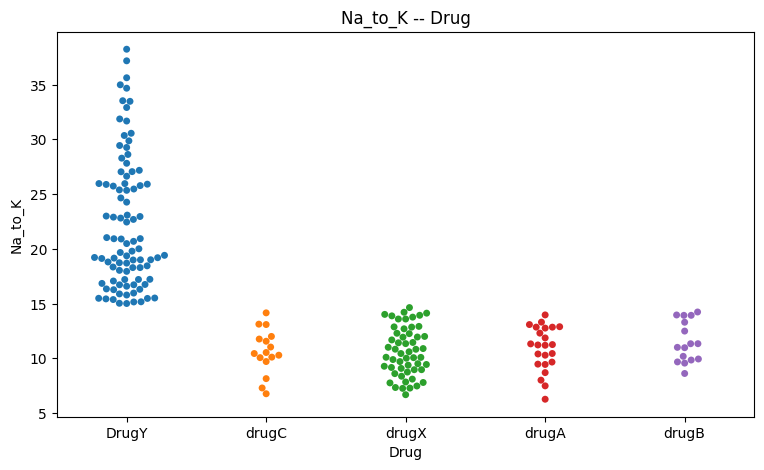

In [89]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df, hue='Drug')
plt.title("Na_to_K -- Drug")
plt.show()

In [90]:
print("Minimum Na_to_K for DrugY:",df.Na_to_K[df.Drug == "DrugY"].min())

Minimum Na_to_K for DrugY: 15.015


* People who have Na_to_K ratio is bigger than 15, get DrugY.
* We can create a new feature from here.

# Cholesterol -- Drug

In [91]:
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


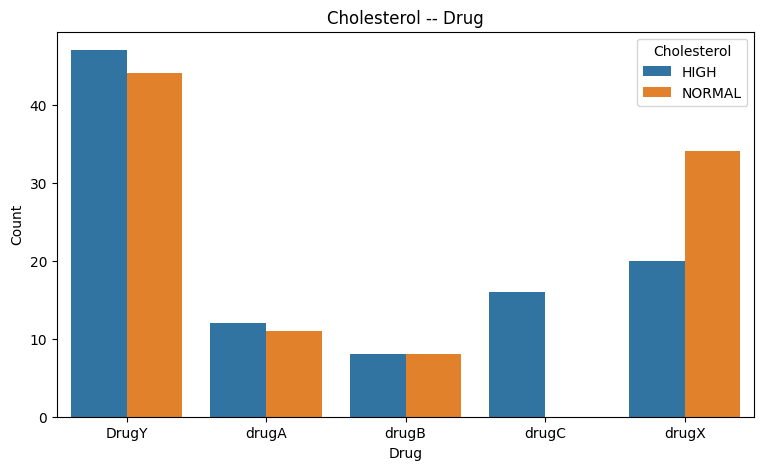

In [92]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()

* drugC is got by people who have HIGH cholesterol.
* Cholesterol is an important feature to classify drugC

# Na_to_K -- BP -- Drug

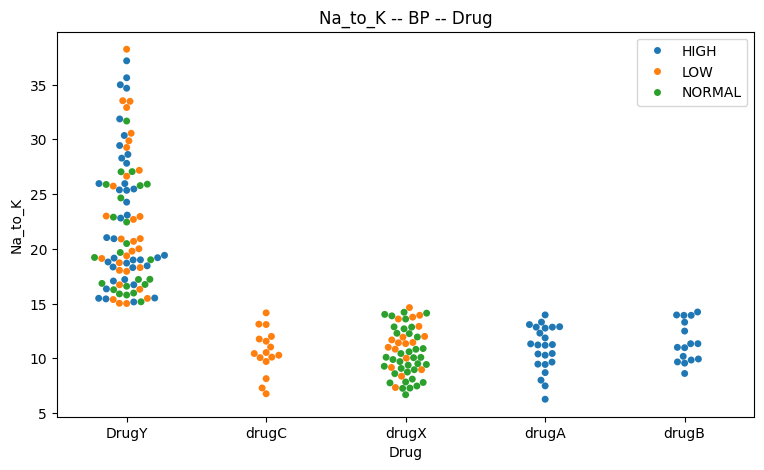

In [93]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = df)
plt.legend()
plt.title("Na_to_K -- BP -- Drug")
plt.show()

* If people have HIGH blood pressure and Na_to_K ratio is lower than 15 , they get drugA and drugB only.
* If people have LOW blood pressure and Na_to_K ratio is lower than 15 , they get drugC only.

# Create New Features
###Na_to_K_Bigger_Than_15
If Na_to_K is bigger than 15, it is always drugY.


In [94]:
df['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in df.Na_to_K]
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1


In [95]:
df_NaK15 = df.groupby(["Drug","Na_to_K_Bigger_Than_15"]).size().reset_index(name = "Count")
df_NaK15

,Drug,Na_to_K_Bigger_Than_15,Count
0,DrugY,1,91
1,drugA,0,23
2,drugB,0,16
3,drugC,0,16
4,drugX,0,54


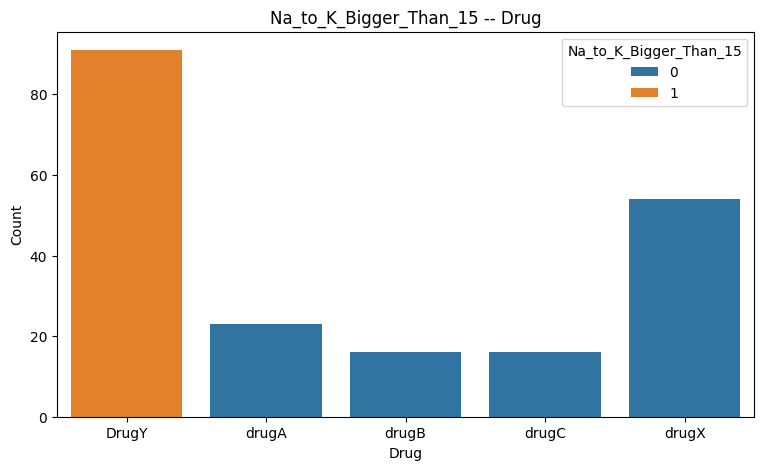

In [96]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Na_to_K_Bigger_Than_15",data = df_NaK15)
plt.title("Na_to_K_Bigger_Than_15 -- Drug")
plt.show()

Na_to_K_Bigger_Than_15 feature will be important feature to drugY classification.

# Label Encoding
We will convert from object to int64

* Sex
* BP
* Cholesterol
* Na_to_K
* Na_to_K_Bigger_Than_15

In [97]:
def label_encoder(y):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])

In [98]:
label_list = ["Sex","BP","Cholesterol","Na_to_K","Drug"]

for l in label_list:
  label_encoder(l)

label_list = ["Sex","BP","Cholesterol","Na_to_K","Drug"]

for l in label_list:
    label_encoder(l)

# 2.Modeling Vũ Vỹ Khang- ITDSIU21090

## Train Test Split

In [99]:
from sklearn.model_selection import train_test_split

x = df.drop(["Drug"],axis=1)
y = df.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (160, 6)
x_test shape: (40, 6)
y_train shape: (160, 1)
y_test shape: (40, 1)


Data was split into 80% train data and 20% test data.

# Model Implementation

In [100]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

## KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(x_test,y_test))

Train Score: 0.59375
Test Score: 0.65


In [103]:
result_dict_train["KNN Default Train Score"] = np.mean(accuracies)
result_dict_test["KNN Default Test Score"] = knn.score(x_test,y_test)

## GridSearchCV

In [104]:
grid = {'n_neighbors':np.arange(1,120),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

knn = KNeighborsClassifier(algorithm = "auto")
knn_cv = GridSearchCV(knn,grid,cv=5)
knn_cv.fit(x_train,y_train)

print("Hyperparameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)
print("Test Score:",knn_cv.score(x_test,y_test))

Hyperparameters: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Train Score: 0.75625
Test Score: 0.7


In [105]:
result_dict_train["KNN GridSearch Train Score"] = knn_cv.best_score_
result_dict_test["KNN GridSearch Test Score"] = knn_cv.score(x_test,y_test)

## Random Forest
Try testing different value of n_estimators and criterion parameters.

In [106]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, x_train, y_train, cv=5)
rfc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(x_test,y_test))

Train Score: 0.98125
Test Score: 0.975


In [107]:
result_dict_train["Random Forest Default Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Default Test Score"] = rfc.score(x_test,y_test)

## SVM Classifier

In [108]:
from sklearn.svm import SVC
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, x_train, y_train, cv=5)
svc.fit(x_train,y_train)
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(x_test,y_test))

Train Score: 0.7125
Test Score: 0.65


In [109]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(x_test,y_test)

## GridSearchCV

In [110]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC ();
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(x_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(x_test,y_test))

Best Parameters: {'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}
Train Score: 0.9875
Test Score: 0.975


In [111]:
result_dict_train["SVM GridSearch Train Score"] = svm_cv.best_score_
result_dict_test["SVM GridSearch Test Score"] = svm_cv.score(x_test,y_test)

# 3.Compare and conclusion

In [112]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index",columns=["Score"])
df_result_train

,Score
KNN Default Train Score,0.59375
KNN GridSearch Train Score,0.75625
Random Forest Default Train Score,0.98125
SVM Default Train Score,0.71250
SVM GridSearch Train Score,0.98750


In [113]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
KNN Default Test Score,0.650
KNN GridSearch Test Score,0.700
Random Forest Default Test Score,0.975
SVM Default Test Score,0.650
SVM GridSearch Test Score,0.975


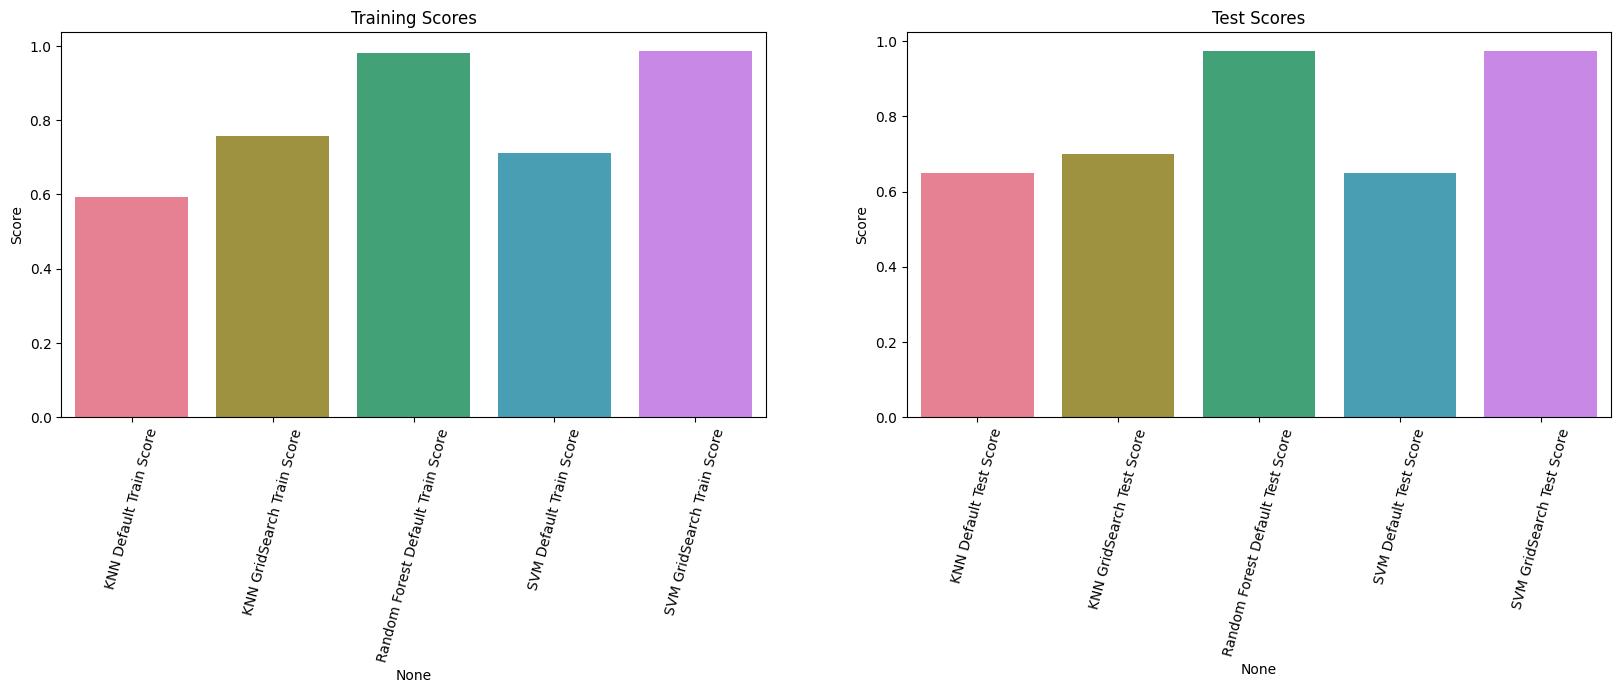

In [120]:

# Create color palettes
palette_train = sns.color_palette("husl", len(df_result_train))
palette_test = sns.color_palette("husl", len(df_result_test))

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Bar plot for training data
sns.barplot(x=df_result_train.index, y=df_result_train.Score, ax=ax[0], palette=palette_train)
ax[0].set_xticklabels(df_result_train.index, rotation=75)
ax[0].set_title("Training Scores")

# Bar plot for test data
sns.barplot(x=df_result_test.index, y=df_result_test.Score, ax=ax[1], palette=palette_test)
ax[1].set_xticklabels(df_result_test.index, rotation=75)
ax[1].set_title("Test Scores")

plt.show()
